In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [5]:
df= pd.read_csv('crime_data.csv')

In [6]:
df= df.drop(['Unnamed: 0'],axis=1)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
# Normalising df
df_norm = pd.DataFrame(normalize(df), columns=df.columns)
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [9]:
# within-cluster sum-of-square criterian
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


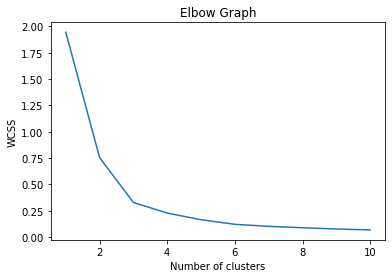

In [10]:
# Plotting Elbow diagram
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Cluster algorithm using K=3
cluster= KMeans (3, random_state=22).fit(df_norm)
cluster

KMeans(n_clusters=3, random_state=22)

In [12]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 1, 0])

In [13]:
# Assign clusters to the dataset
df['cluster_id'] = cluster.labels_

In [14]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [15]:
# These are standardisd values
cluster.cluster_centers_

array([[0.04544868, 0.95210555, 0.27128802, 0.10877231],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.03824062, 0.86500142, 0.47897132, 0.12490787]])

In [16]:
# Group by cluster
df.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.387500,243.750000,67.208333,27.287500
1,1,2.616667,54.833333,62.000000,12.333333
2,2,5.020000,117.950000,64.600000,16.635000


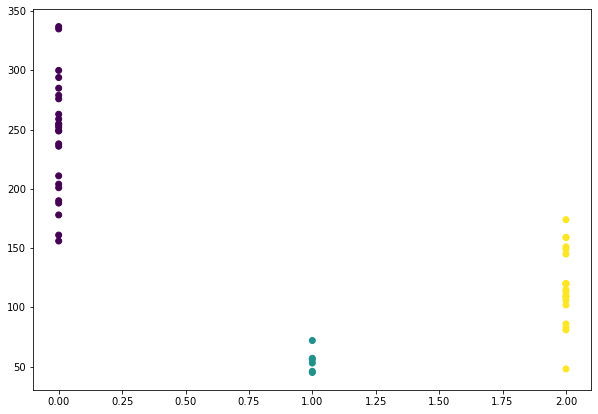

In [19]:
# Plotting the cluster
plt.figure(figsize=(10,7))
plt.scatter(df['cluster_id'],df['Assault'],c= cluster.labels_);